P1> Calculate ROI ( Return on Investment ) for each movie
	ROI is calculated as : Profit / Budget
	Profit is calculated as : BoxOffice Collections - Budget
	Which are the top 3 movies with highest ROI across all industries?
	Which are the top 3 Hindi movies with highest ROI?
	Which are the top 3 Telugu movies with highest ROI?
	Plot all this information in separate graphs


In [2]:
import pandas as pd


bollywood_df = pd.read_excel("bollywood.xlsx")
tollywood_df = pd.read_excel("tollywood.xlsx")
indian_movies_df = pd.read_excel("indian.xlsx")




In [4]:
bollywood_df.head()

,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,0,MOV001,Lagaan,Ashutosh Gowariker,Sports Drama,2001,91.511628,100,8.1,224,Aamir Khan,Gracy Singh,Hindi,Aamir Khan Productions
1,1,MOV002,Kabhi Khushi Kabhie Gham...,Karan Johar,Family Drama,2001,50.000000,100,7.9,210,Shah Rukh Khan,Kajol,Hindi,Dharma Productions
2,2,MOV003,M.S. Dhoni: The Untold Story,Neeraj Pandey,Biographical Sports Drama,2016,91.511628,215,7.9,184,Sushant Singh Rajput,Kiara Advani,Hindi,Fox Star Studios
3,3,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017,250.000000,1810,8.2,171,Prabhas,Anushka Shetty,Telugu,Arka Media Works
4,4,MOV005,Chennai Express,Rohit Shetty,Action Comedy,2013,91.511628,423,6.4,141,Shah Rukh Khan,Deepika Padukone,Hindi,Red Chillies Entertainment


In [6]:
tollywood_df.head()

,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,0,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017,250,1810,8.2,171,Prabhas,Anushka Shetty,Telugu,Arka Media Works
1,1,MOV021,Bahubali: The Beginning,S. S. Rajamouli,Epic Fantasy Action,2015,180,650,8.1,159,Prabhas,Tamannaah,Telugu,Arka Media Works
2,2,MOV023,Sye Raa Narasimha Reddy,Surender Reddy,Historical Action,2019,200,265,7.1,167,Chiranjeevi,Nayanthara,Telugu,Konidela Production Company
3,3,MOV025,Jersey,Gowtam Tinnanuri,Sports Drama,2019,20,45,7.8,128,Nani,Shraddha Srinath,Telugu,Sithara Entertainments
4,4,MOV027,Geetha Govindam,Parasuram,Romantic Comedy,2018,10,130,7.4,148,Vijay Deverakonda,Rashmika Mandanna,Telugu,GA2 Pictures


In [7]:
indian_movies_df.head()

,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,7,MOV008,Sarkar (Tamil),A. R. Murugadoss,Action Thriller,2005,25,47.5,7.5,173,Vijay,Keerthy Suresh,Tamil,Kalaignar TV
1,9,MOV010,2.0 (Tamil),S. Shankar,Science Fiction Action,2018,550,800.0,6.9,147,Rajinikanth,Amy Jackson,Tamil,Lyca Productions
2,21,MOV022,K.G.F: Chapter 1,Prashanth Neel,Action Drama,2018,50,250.0,7.9,156,Yash,Srinidhi Shetty,Kannada,Hombale Films
3,23,MOV024,Avengers: Endgame (Dubbed),"Anthony Russo, Joseph Russo",Superhero,2019,25,47.5,8.4,181,Robert Downey Jr.,Scarlett Johansson,"English (Dubbed in Telugu, Kannada, Hindi)",Marvel Studios
4,25,MOV026,Pailwaan,S. Krishna,Sports Action,2019,30,55.0,6.8,166,Sudeep,Aakanksha Singh,Kannada,RRR Motion Pictures


In [9]:
# Combining all datasets into one
movies_df = pd.concat([bollywood_df, tollywood_df, indian_movies_df], ignore_index=True)

print(movies_df.head())

   index MovieID                         Title            Director  \
0      0  MOV001                        Lagaan  Ashutosh Gowariker   
1      1  MOV002   Kabhi Khushi Kabhie Gham...         Karan Johar   
2      2  MOV003  M.S. Dhoni: The Untold Story       Neeraj Pandey   
3      3  MOV004   Baahubali 2: The Conclusion     S. S. Rajamouli   
4      4  MOV005               Chennai Express        Rohit Shetty   

                       Genre  ReleaseYear  Budget (Crores)  \
0               Sports Drama         2001        91.511628   
1               Family Drama         2001        50.000000   
2  Biographical Sports Drama         2016        91.511628   
3        Epic Fantasy Action         2017       250.000000   
4              Action Comedy         2013        91.511628   

   BoxOffice (Crores)  Rating  Duration (minutes)             LeadActor  \
0               100.0     8.1                 224            Aamir Khan   
1               100.0     7.9                 210       

1: Calculate ROI for Each Movie


In [10]:
movies_df["Profit"] = movies_df["BoxOffice (Crores)"] - movies_df["Budget (Crores)"]


In [11]:
movies_df["ROI"] = movies_df["Profit"] / movies_df["Budget (Crores)"]

 Top 3 movies with highest ROI across all industries

In [13]:
top_3_movies = movies_df.nlargest(3, "ROI")[["Title", "Language", "ROI"]]
top_3_movies


,Title,Language,ROI
6,Dangal,Hindi,29.571429
40,Dilwale Dulhania Le Jayenge,Hindi,14.250000
44,3 Idiots,Hindi,12.142857


Top 3 Hindi movies with highest ROI

In [15]:
top_3_hindi = movies_df[movies_df["Language"] == "Hindi"].nlargest(3, "ROI")[["Title", "ROI"]]
top_3_hindi

,Title,ROI
6,Dangal,29.571429
40,Dilwale Dulhania Le Jayenge,14.250000
44,3 Idiots,12.142857


Top 3 Telugu movies with highest ROI

In [18]:
top_3_telugu = movies_df[movies_df["Language"] == "Telugu"].nlargest(3, "ROI")[["Title", "ROI"]]
top_3_telugu

,Title,ROI
26,Geetha Govindam,12.00
59,Geetha Govindam,12.00
3,Baahubali 2: The Conclusion,6.24


Plotting the Results

In [20]:
import matplotlib.pyplot as plt


 Plot Top 3 Movies with Highest ROI Across All Industries

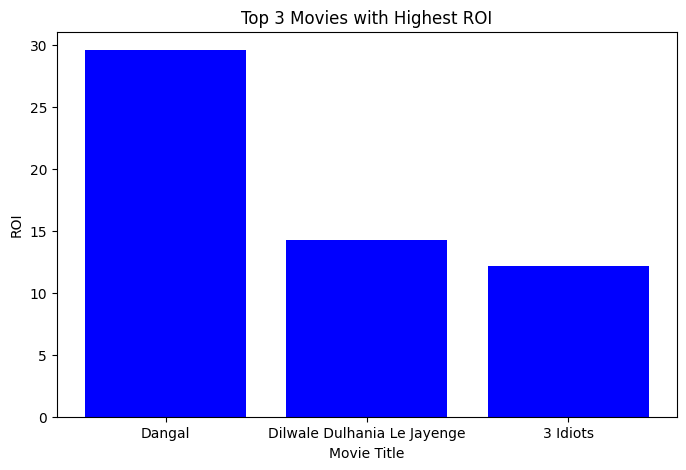

In [25]:

plt.figure(figsize=(8, 5))
plt.bar(top_3_movies["Title"], top_3_movies["ROI"], color='blue')
plt.xlabel("Movie Title")
plt.ylabel("ROI")
plt.title("Top 3 Movies with Highest ROI")
plt.show()

 Plot Top 3 Hindi Movies with Highest ROI

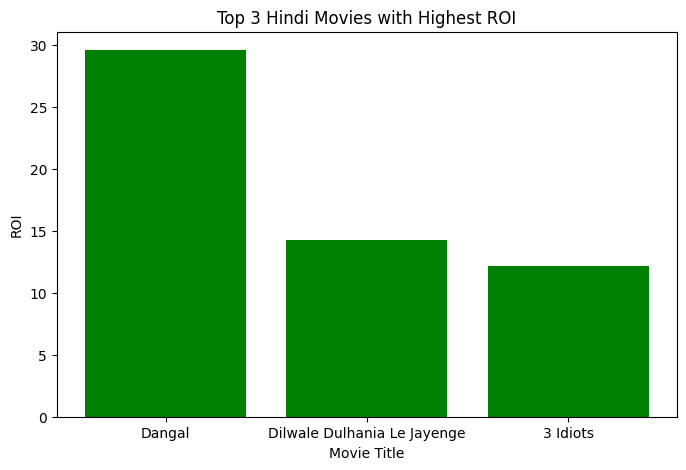

In [26]:

plt.figure(figsize=(8, 5))
plt.bar(top_3_hindi["Title"], top_3_hindi["ROI"], color='green')
plt.xlabel("Movie Title")
plt.ylabel("ROI")
plt.title("Top 3 Hindi Movies with Highest ROI")

plt.show()

 Plot Top 3 Telugu Movies with Highest ROI

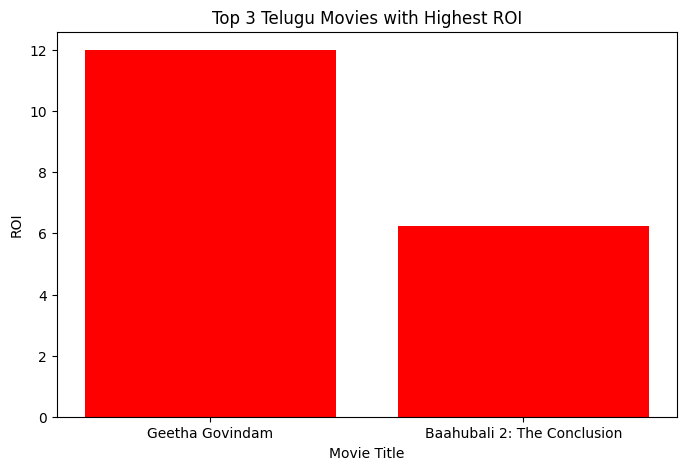

In [32]:
plt.figure(figsize=(8, 5))
plt.bar(top_3_telugu["Title"], top_3_telugu["ROI"], color='red')
plt.xlabel("Movie Title")
plt.ylabel("ROI")
plt.title("Top 3 Telugu Movies with Highest ROI")
plt.show()